# WHAT DOES MY BAND LIKE TO SING ABOUT?

In [24]:
import pandas as pd
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import os
from os.path import join as pjoin
import numpy as np
import pandas as pd
from time import time, sleep, strftime, localtime
from datetime import datetime

%reload_ext autoreload
%autoreload 1

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', 100)

display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

In [2]:
import re, string
import requests
from bs4 import BeautifulSoup
from itertools import groupby
from Utils.DataUtils import *

In [3]:
all_songs_df = pd.read_csv("./ironmaiden.csv")
df_band_albums = pd.read_csv("./df_band_albums.csv")

In [4]:
discography_df = pd.merge(left=df_band_albums[["title", "year", "is_single"]], right=all_songs_df,left_on="title", right_on="album_name", how="inner")
discography_df.drop("album_name", axis=1, inplace=True)
display(
    discography_df.shape,
    discography_df.head()
)

(186, 5)

,title,year,is_single,song_name,song_lyrics
0,Iron Maiden,1980,False,'Prowler',"Walking through the city, looking oh so pretty\nI've just got to find my way\nSee the ladies fla..."
1,Iron Maiden,1980,False,'Sanctuary',Out of winter came a warhorse of steel\nI've never killed a woman before\nBut I know how it feel...
2,Iron Maiden,1980,False,'Remember Tomorrow',"Unchain the colours before my eyes,\nYesterday's sorrows, tomorrow's white lies.\nScan the horiz..."
3,Iron Maiden,1980,False,'Running Free',"Just sixteen, a pickup truck, out of money, out of luck.\nI've got nowhere to call my own, hit t..."
4,Iron Maiden,1980,False,'Phantom Of The Opera',I've been looking so long for you now you won't get away from my grasp\nYou've been living so lo...


In [5]:
analyse_nans(discography_df)

,title,year,is_single,song_name,song_lyrics
total,0,0,0,0,0
percentage,0,0,0,0,0
idx_list,[],[],[],[],[]


# Drop the Nans

In [6]:
discography_df.dropna(inplace=True, axis=0)

#  Combine the songs for each album

In [7]:
q = "(is_single==False)"
album_df = discography_df.query(q)[["title", "year", "song_lyrics"]]
album_df["song_lyrics"] = discography_df.query(q).groupby(["title", "year"])['song_lyrics'].transform(lambda x: ' '.join(x))
album_df.drop_duplicates(inplace=True)
album_df

,title,year,song_lyrics
0,Iron Maiden,1980,"Walking through the city, looking oh so pretty\nI've just got to find my way\nSee the ladies fla..."
8,Killers,1981,"I was born into a scene of angriness and greed, and dominance and persecution.\nMy mother was a ..."
17,The Number Of The Beast,1982,Longboats have been sighted the evidence of war has begun\nMany Nordic fighting men their swords...
26,Piece Of Mind,1983,"It's snowing outside the rumbling sound\nof engines roar in the night,\nThe mission is near the ..."
35,Powerslave,1984,There goes the siren that warns of the air raid\nThen comes the sound of the guns sending flak\n...
42,Somewhere In Time,1986,If you had the time to lose\nAn open mind and time to choose\nWould you care to take a look\nOr ...
50,Seventh Son Of A Seventh Son,1988,Seven deadly sins\nSeven ways to win\nSeven holy paths to hell\nAnd your trip begins\n\nSeven do...
58,No Prayer For The Dying,1990,Trace your way back 50 years\nTo the Glow of Dresden - blood and tears\nIn the black above by th...
68,Fear Of The Dark,1992,Covered in sinners and dripping with guilt\nMaking your money from slime and from filth\nParadin...
85,The XFactor,1995,Eleven saintly shrouded men\nSilhouettes stand against the sky\nOne in front with a cross held h...


# Cleaning 

In [8]:
# Remove all the escape delimiters in the lyrics
album_df["title"] = album_df["title"].apply(str.strip)

In [9]:
# Remove all the escape delimiters in the lyrics
album_df["song_lyrics"] = album_df["song_lyrics"].apply(lambda s: re.sub("[\n\t\r]", ' ', s))

In [10]:
# What all special characters exist in the lyrics? 
unique_characters = list(set(''.join(album_df["song_lyrics"].apply(lambda s: re.sub("[\w]", '', s)).values.ravel()[0])))
print("these are the non-alphanumeric unique characters - ", unique_characters)
# Keep only the alphabets, remove numeric characters
album_df["song_lyrics"] = album_df["song_lyrics"].apply(lambda s: re.sub("[^a-zA-Z]", ' ', s))

these are the non-alphanumeric unique characters -  ["'", '[', '?', ',', '.', '"', ' ', ']']


In [11]:
# What all special characters exist in the lyrics? 
unique_characters = list(set(''.join(album_df["song_lyrics"].apply(lambda s: re.sub("[\w]", '', s)).values.ravel()[0])))
unique_characters

[' ']

# Lower case  

In [12]:
album_df["song_lyrics"] = album_df["song_lyrics"].apply(str.lower)

# WordClouds 

In [13]:
from wordcloud import WordCloud
from sklearn.feature_extraction import text 


wc = WordCloud(stopwords=text.ENGLISH_STOP_WORDS, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [14]:
album_df.reset_index(drop=True, inplace=True)
# album_df

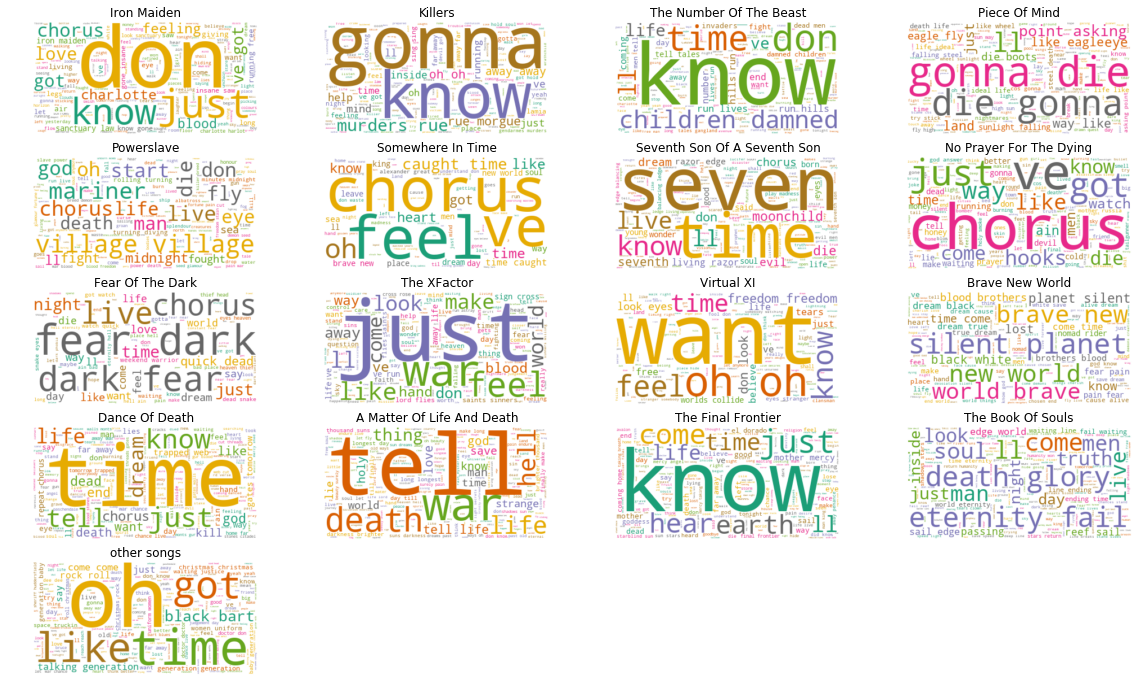

In [15]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 12]

albums = album_df["title"]

# Create subplots for each album
for idx, album in zip(album_df.index, albums):
    q = "title==\""+album+"\""
    wc.generate(album_df.query(q)["song_lyrics"].values[0])
    
    plt.subplot(5, 4, idx+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(album)
    
plt.show()

We definitely need to adminisiter more cleaning and remove some of the irrelevant words

Let's get a list of the most common words in each album

# Tokenize  

In [16]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(album_df["song_lyrics"])

In [17]:
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = album_df["title"]
data_dtm.head()

,abandoned,abates,abide,ablaze,able,aboard,absolution,abuse,abused,abyss,acacia,accept,accompany,according,accursed,...,yearning,years,yeeeeaaaaaaaahhhh,yellow,yes,yesterday,yield,yoke,yorkshire,young,youth,yowsa,zeal,zero,zone
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Iron Maiden,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
Killers,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1
The Number Of The Beast,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Piece Of Mind,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0
Powerslave,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [18]:
data_dtm.index

Index(['Iron Maiden', 'Killers', 'The Number Of The Beast', 'Piece Of Mind', 'Powerslave',
       'Somewhere In Time', 'Seventh Son Of A Seventh Son', 'No Prayer For The Dying',
       'Fear Of The Dark', 'The XFactor', 'Virtual XI', 'Brave New World', 'Dance Of Death',
       'A Matter Of Life And Death', 'The Final Frontier', 'The Book Of Souls', 'other songs'],
      dtype='object', name='title')

In [20]:
data_dtm_t = data_dtm.transpose()
# for alb in data_dtm.index:
#     print(data_dtm_t[alb].sort_values(ascending=False)[:10])

------------

# LDA topic modeling

In [21]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
 
NUM_TOPICS = 3
 
# Make the vectorizer and vectorize the data
vectorizer = CountVectorizer(min_df=0.1,  # if a word exists in less than 30 documents, ignore them
                             max_df=0.8,  # Avoid words that come in over 80% of all documents
                             stop_words='english', 
                             lowercase=True, 
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(album_df["song_lyrics"])
 
# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, 
                                      max_iter=10,
                                      learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)

In [22]:
import os
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [23]:
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=                 x           y  topics  cluster       Freq
topic                                                     
0      -632.045471 -384.325073       1        1  68.879147
1     -1209.665405  212.164124       2        1  20.095749
2     -1437.453247 -586.322510       3        1  11.025104, topic_info=     Category       Freq         Term      Total  loglift  logprob
556   Default  80.000000        gonna  80.000000  30.0000  30.0000
1143  Default  33.000000       silent  33.000000  29.0000  29.0000
857   Default  42.000000          new  42.000000  28.0000  28.0000
918   Default  23.000000       planet  23.000000  27.0000  27.0000
132   Default  22.000000        brave  22.000000  26.0000  26.0000
101   Default  49.000000        black  49.000000  25.0000  25.0000
110   Default  56.000000        blood  56.000000  24.0000  24.0000
1438  Default  18.000000        white  18.000000  23.0000  23.0000
510   Default  19.000000      freedom  19.000000  22.0000  22.0000
1027  Default  28.000000        right  28.000000  21.0000  21.0000
183   Default  32.000000        cause  32.000000  20.0000  20.0000
1347  Default  23.000000         true  23.000000  19.0000  19.0000
486   Default  36.000000          fly  36.000000  18.0000  18.0000
733   Default  36.000000         left  36.000000  17.0000  17.0000
147   Default  14.000000     brothers  14.000000  16.0000  16.0000
20    Default  17.000000        alive  17.000000  15.0000  15.0000
616   Default  30.000000         hide  30.000000  14.0000  14.0000
1078  Default  35.000000         save  35.000000  13.0000  13.0000
771   Default  49.000000         love  49.000000  12.0000  12.0000
1287  Default  30.000000        tears  30.000000  11.0000  11.0000
1384  Default  14.000000      village  14.000000  10.0000  10.0000
373   Default  37.000000       dreams  37.000000   9.0000   9.0000
604   Default  28.000000        heart  28.000000   8.0000   8.0000
988   Default  21.000000       really  21.000000   7.0000   7.0000
1116  Default  16.000000        shall  16.000000   6.0000   6.0000
323   Default  15.000000       demons  15.000000   5.0000   5.0000
1112  Default  16.000000        seven  16.000000   4.0000   4.0000
82    Default  34.000000      believe  34.000000   3.0000   3.0000
44    Default  14.000000       asking  14.000000   2.0000   2.0000
1242  Default  11.000000     stranger  11.000000   1.0000   1.0000
532    Topic1  49.552164   generation  51.789530   0.3287  -5.0554
1462   Topic1  19.308734        women  20.357251   0.3199  -5.9979
1314   Topic1  17.553970         till  18.556871   0.3173  -6.0931
548    Topic1  20.862978        glory  22.080345   0.3161  -5.9204
806    Topic1  17.427971        mercy  18.472935   0.3146  -6.1003
357    Topic1  15.767255       doctor  16.735279   0.3132  -6.2005
56     Topic1  19.085245         baby  20.347151   0.3088  -6.0095
835    Topic1  26.446471       mother  28.234531   0.3074  -5.6833
315    Topic1  13.088232          dee  13.999511   0.3055  -6.3867
443    Topic1  12.250678         fast  13.120627   0.3042  -6.4528
513    Topic1  13.884318      friends  14.882415   0.3034  -6.3277
403    Topic1  12.123349       ending  13.047152   0.2994  -6.4633
93     Topic1  12.140575          big  13.089755   0.2975  -6.4619
1114   Topic1  24.498156      shadows  26.450458   0.2961  -5.7598
1025   Topic1  11.221511         ride  12.141213   0.2940  -6.5406
1234   Topic1  11.221998         stop  12.166709   0.2920  -6.5405
842    Topic1  13.683980      murders  14.838027   0.2918  -6.3422
1334   Topic1  10.328267      trapped  11.224597   0.2896  -6.6235
564    Topic1  11.155012        great  12.126661   0.2893  -6.5465
1146   Topic1  12.806122         sing  13.948265   0.2874  -6.4085
1098   Topic1   8.663005      secrets   9.436190   0.2873  -6.7994
606    Topic1  10.307490       hearts  11.230706   0.2870  -6.6255
1040   Topic1  18.510761         rock  20.197084   0.2856  -6.0401
612    Topic1  40.082763         hell  43.81

---------

---------

---------

---------

---------

In [14]:
# dtm_filename = "iron_maiden_dtm.pkl"
# save_to_disk(data_dtm, dtm_filename)

----------------

In [15]:
# data = load_from_disk(dtm_filename)
# data.shape